<a href="https://colab.research.google.com/github/sminashetty208/sminashetty208/blob/cancer-prediction/canceruaesmina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Title: Predicting Cancer Outcomes Using Machine Learning"**

**Problem Statement**

Worldwide cancer stands as the main reason for mortality and prompt diagnosis serves as the vital element for enhancing survival rates and treatment success. Physical diagnosis tools need to provide accurate results quickly so medical staff can intervene immediately yet practical cancer detection requires intensive procedures. Machine learning technology provides an effective automation system to help healthcare providers build quick and educated diagnostic decisions. Children diagnosed with cancer at an early stage give physicians better possibilities for successful treatments yet difficulties in prompt diagnosis persist. The development of a binary classification model requires analysis of the UAE Cancer Patient Dataset from Kaggle that includes clinical and demographic cancer patient information. The dataset includes patient characteristics such as age together with tumor measurement data and texture observations and diagnostic results (between malignant and benign cases) which enables building a predictive model for tumor cancer identification. The use of machine learning enables this model to transform into an automated diagnostic system which assists health professionals with their early and precise diagnostic capabilities.


Dataset Citation:

AK0212. (2020). UAE Cancer Patient Dataset. Kaggle. Available at: https://www.kaggle.com/datasets/ak0212/uae-cancer-patient-dataset/data (Accessed: 2 April 2025).

**Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


**Data Engineering**

In [ ]:
dataset_path = "_cancer_dataset_uae.csv"
df_cancer = pd.read_csv(dataset_path)
print(df_cancer.info())
print(df_cancer.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

**Data Exploration & Preprocessing**

Missing values summary:
                Missing Values  Percentage
Death_Date                9008       90.08
Cause_of_Death            9008       90.08
Comorbidities             4047       40.47


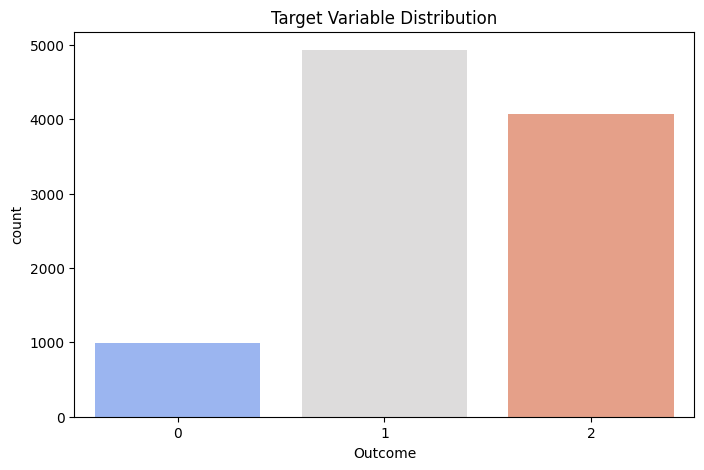

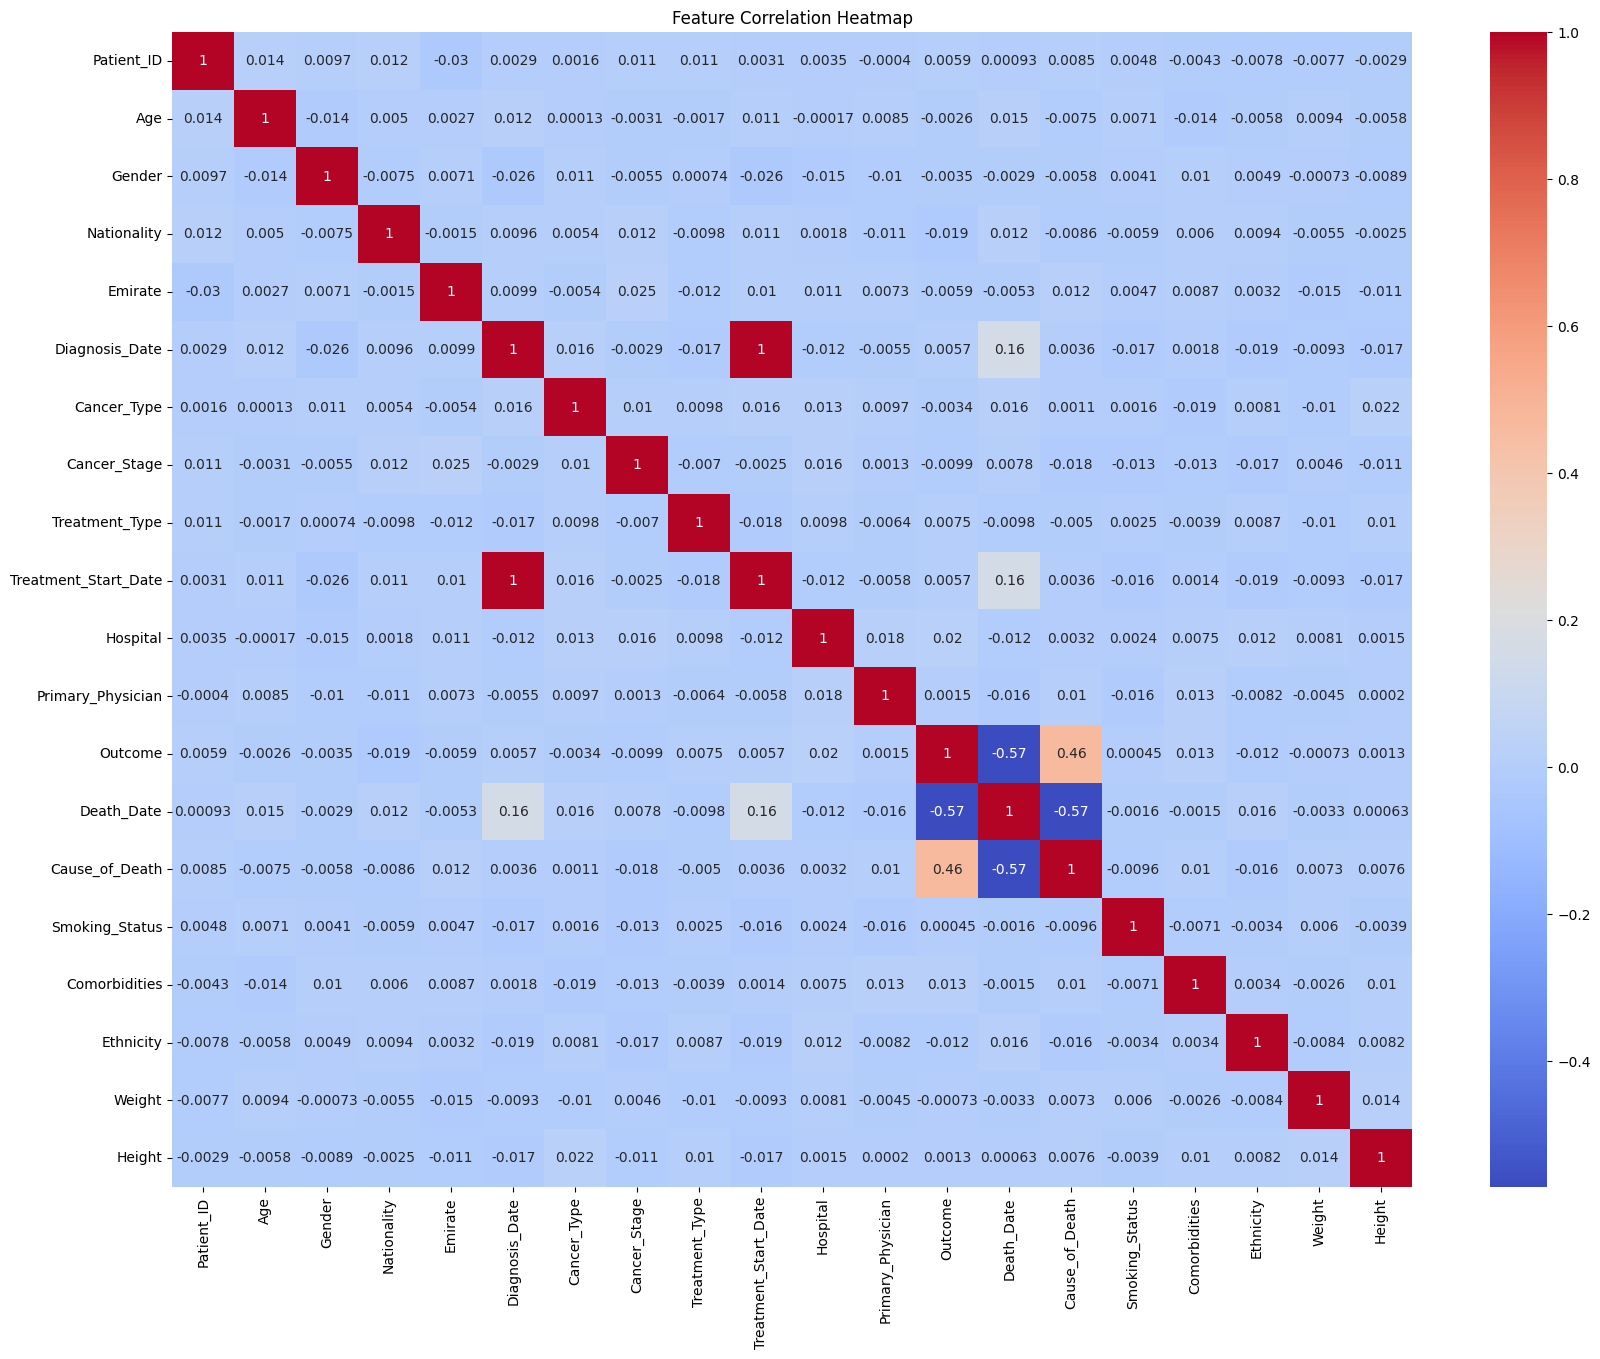

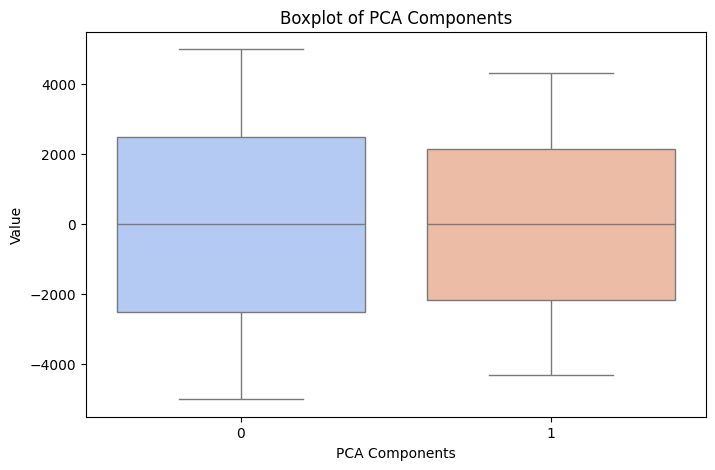

In [ ]:

def check_missing_values(data):
    missing_counts = data.isnull().sum()
    missing_percent = (missing_counts / len(data)) * 100
    missing_summary = pd.DataFrame({"Missing Values": missing_counts, "Percentage": missing_percent})
    return missing_summary[missing_summary["Missing Values"] > 0]
missing_values = check_missing_values(df_cancer)
print("Missing values summary:")
print(missing_values)

for col in df_cancer.select_dtypes(include=['object']).columns:
    df_cancer[col] = df_cancer[col].fillna(df_cancer[col].mode()[0])

for col in df_cancer.select_dtypes(include=[np.number]).columns:
    df_cancer[col] = df_cancer[col].fillna(df_cancer[col].median())

duplicate_count = df_cancer.duplicated().sum()
if duplicate_count > 0:
    df_cancer = df_cancer.drop_duplicates()
    print(f"Removed {duplicate_count} duplicate rows.")

target_variable = 'Outcome'
df_cancer = df_cancer.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

X_features = df_cancer.drop(columns=[target_variable])
y_target = df_cancer[target_variable]

def select_k_best_features(X, y, k=5):

    X_numeric = X.select_dtypes(include=[np.number])
    selector = SelectKBest(score_func=chi2, k=k)
    X_new = selector.fit_transform(X_numeric, y)
    return X_new, selector.get_support()

X_selected, selected_features = select_k_best_features(X_features, y_target, k=5)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

plt.figure(figsize=(8, 5))
sns.countplot(x=df_cancer[target_variable], palette='coolwarm')
plt.title("Target Variable Distribution")
plt.show()

plt.figure(figsize=(20, 15))
corr_matrix = df_cancer.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=X_pca, palette='coolwarm')
plt.title("Boxplot of PCA Components")
plt.xlabel("PCA Components")
plt.ylabel("Value")
plt.show()
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y_target, test_size=0.4, random_state=42, stratify=y_target)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

A codebase exists to prepare datasets for machine learning operations. The program first evaluates missing data points then shows what proportion and number of data points are absent. The most common value fills categorical missing data points while numerical missing data points receive the median value in place. The procedure detects duplicate rows to eliminate them. The label-encoded target variable transforms its categorical values into numerical code.

The classification task receives its most applicable 5 features by implementing SelectKBest with the Chi-square evaluation method. The used features receive Principal Component Analysis treatment to transform them into 2 primary components. As part of visualization the target variable distribution receives a count plot analysis while a heatmap presents feature correlations. The PCA component spread gets evaluated through a boxplot analysis.

The data split process creates training and validation along with test sections through train_test_split. A portion of the data serves validation while testing occurs simultaneously with an equal stratified distribution to preserve class balance throughout each set.

**Model Implementation**

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4817 - loss: -13.4547 - val_accuracy: 0.4930 - val_loss: -353.6771
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4965 - loss: -1340.5347 - val_accuracy: 0.5030 - val_loss: -8321.4307
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5124 - loss: -16993.6816 - val_accuracy: 0.5270 - val_loss: -56902.9609
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5260 - loss: -89115.1953 - val_accuracy: 0.5385 - val_loss: -286358.7188
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5400 - loss: -325991.2500 - val_accuracy: 0.5530 - val_loss: -898448.0625
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5410 - loss: -886699.6250 - val_accuracy: 0.5670 - val_loss: -1459906.7500
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5456 - loss: -1947512.5000 - val_accuracy: 0.5640 - val_loss: -2857991.2500
Epoch 8/50
188/188 ━━━━━━━━━━━━

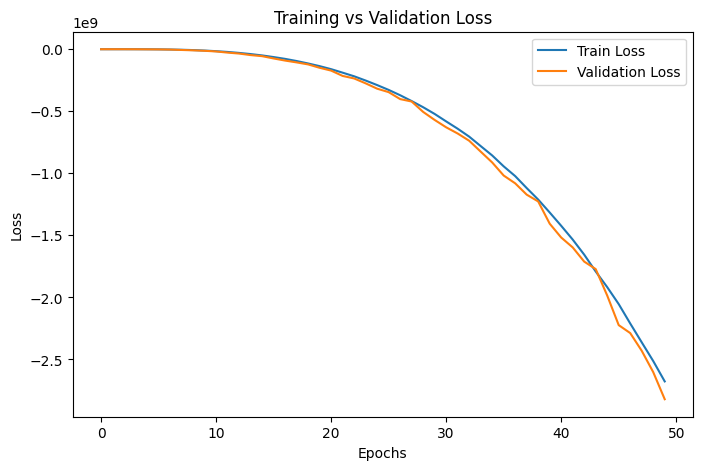

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5902 - loss: -2701955584.0000
Test Loss: -2820155136.0000
Test Accuracy: 0.5720
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[158  41   0]
 [  0 986   0]
 [  0 815   0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.89       199
           1       0.54      1.00      0.70       986
           2       0.00      0.00      0.00       815

    accuracy                           0.57      2000
   macro avg       0.51      0.60      0.53      2000
weighted avg       0.36      0.57      0.43      2000



In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


y_pred = (model.predict(X_test) > 0.5).astype("int32")


from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

A neural network binary classifier gets developed through Keras for training purposes. A four-layer model includes three Tightening layers using ReLU activation followed by a sigmoid activation layer for probability output. Preventing overfitting in the model occurs through the application of Batch normalization and dropout strategies. The system compilation uses Adam optimizer with the binary_crossentropy loss function together with accuracy evaluation. The training process completes 50 epochs while handling 32 samples per batch and employs validation data for evaluation purposes. Following training the model, loss data is plotted for both training and validation purposes to check their performance. Predictions are gathered through applying a threshold to the evaluation of the model on the test data. Performance evaluation is achieved through printing the confusion matrix and classification report.

**Experimental Section**

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_features)
y = y_target
configurations = [
    (32, 16, 0.1, 0.01), (64, 32, 0.2, 0.005), (128, 64, 0.3, 0.001),
    (256, 128, 0.4, 0.0005), (128, 32, 0.2, 0.01), (64, 64, 0.25, 0.005),
    (256, 64, 0.3, 0.001), (32, 32, 0.15, 0.01), (128, 128, 0.35, 0.0005),
    (256, 256, 0.4, 0.0001)
]

def train_and_evaluate(config):
    units1, units2, dropout_rate, lr = config
    mae_scores, r2_scores = [], []

    for train_idx, val_idx in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = Sequential([
            Dense(units1, activation="relu", input_shape=(X_train.shape[1],)),
            BatchNormalization(),
            Dropout(dropout_rate),
            Dense(units2, activation="relu"),
            BatchNormalization(),
            Dense(1, activation="linear")
        ])
        model.compile(optimizer=Adam(learning_rate=lr), loss='mean_absolute_error', metrics=["mae"])

        early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

        model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val),
                  verbose=0, callbacks=[early_stopping])

        y_pred = model.predict(X_val).flatten()
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        r2_scores.append(r2_score(y_val, y_pred))

    return (f"{units1}-{units2}", dropout_rate, lr, np.mean(mae_scores), np.mean(r2_scores))
experiment_results = [train_and_evaluate(cfg) for cfg in configurations]
print("\nExperimental Results:")
print("{:<15} {:<10} {:<10} {:<15} {:<15}".format("Model Structure", "Dropout", "LR", "MAE", "R2"))
for res in experiment_results:
    print("{:<15} {:<10} {:<10} {:<15.3f} {:<15.3f}".format(res[0], res[1], res[2], res[3], res[4]))
optimal_config = min(experiment_results, key=lambda x: x[3])
print(f"\nBest Configuration: {optimal_config[0]}, Dropout: {optimal_config[1]}, LR: {optimal_config[2]}, MAE: {optimal_config[3]:.3f}, R2: {optimal_config[4]:.3f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━

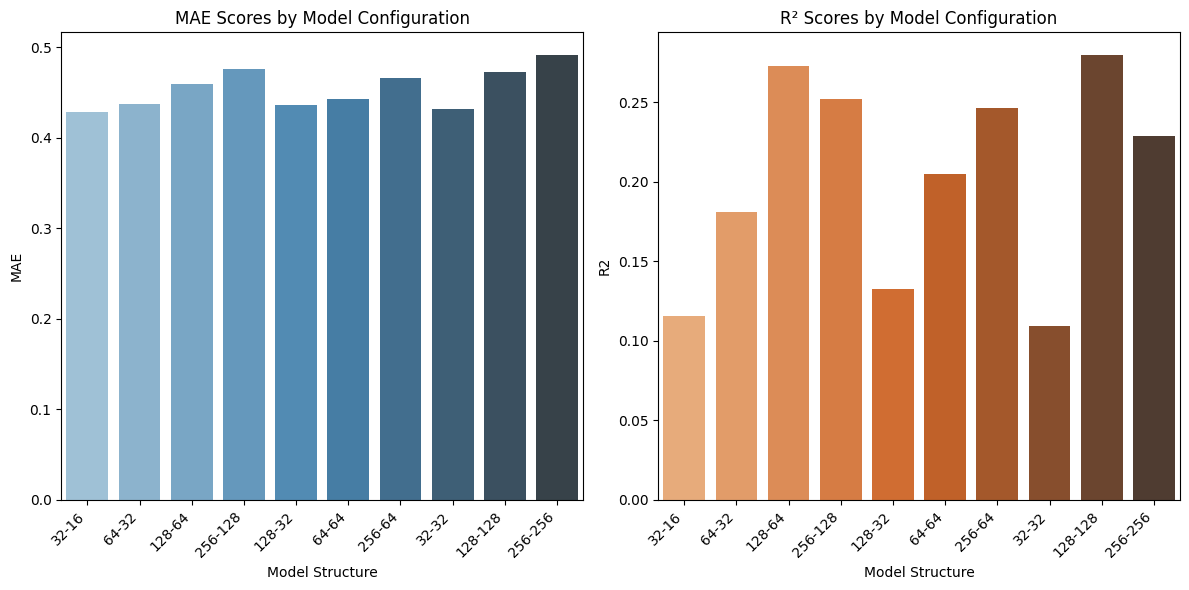

In [ ]:
model_structure = [res[0] for res in experiment_results]
mae_scores = [res[3] for res in experiment_results]
r2_scores = [res[4] for res in experiment_results]
df_results = pd.DataFrame({
    'Model Structure': model_structure,
    'MAE': mae_scores,
    'R2': r2_scores
})
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model Structure', y='MAE', data=df_results, palette='Blues_d')
plt.title('MAE Scores by Model Configuration')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.barplot(x='Model Structure', y='R2', data=df_results, palette='Oranges_d')
plt.title('R² Scores by Model Configuration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The code carries out training and evaluation of several neural network configurations in order to identify optimal hyperparameters. The algorithm begins by utilizing MinMaxScaler for feature scaling followed by defining multiple model structures that have different units and learning rates together with dropout rates. A two-layer neural network receives training as each configuration includes features of batch normalization and dropout. Early stopping alongside the Adam optimizer works to stop overfitting during training. Calculations of Mean Absolute Error (MAE) and R² scores take place after the training session of each model. The selection of best configuration depends on choosing the model with the lowest MAE value. The information is displayed through structured formatting alongside bar plot visualizations.

**Hyperparameter Tuning**

In [ ]:
def check_for_nans(X, y):
    print("Checking for NaN values...")
    print(f"X_train shape: {X.shape}, y_train shape: {y.shape}")
    print(f"NaNs in X_train: {np.isnan(X).sum()}")
    print(f"NaNs in y_train: {np.isnan(y).sum()}")
def build_model(layers, dropout_rates, optimizer, activation_function, learning_rate):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    for i in range(len(layers)):
        model.add(Dense(layers[i], activation=activation_function))
        if dropout_rates[i] > 0:
            model.add(Dropout(dropout_rates[i]))

    model.add(Dense(1, activation='linear'))

    optimizers = {"Adam": Adam, "RMSprop": RMSprop, "SGD": SGD}
    opt = optimizers[optimizer](learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mae'])
    return model
def create_keras_regressor(layers, dropout_rates, optimizer, activation_function, learning_rate):
    try:
        return KerasRegressor(
            build_fn=lambda: build_model(
                layers=layers,
                dropout_rates=dropout_rates,
                optimizer=optimizer,
                activation_function=activation_function,
                learning_rate=learning_rate
            ),
            epochs=50,
            batch_size=32,
            verbose=0,
            callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
        )
    except Exception as e:
        print(f"Error in Model Training: {e}")
        return None
best_layers = [32, 16]
best_dropout_rates = [0.1, 0.1]
best_optimizer = 'Adam'
best_activation_function = 'relu'
best_learning_rate = 0.001
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

check_for_nans(X_train_scaled, y_train)
X_train_scaled = np.nan_to_num(X_train_scaled)
y_train = np.nan_to_num(y_train)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", create_keras_regressor(best_layers, best_dropout_rates, best_optimizer, best_activation_function, best_learning_rate))
])

param_grid = {
    'model__epochs': [50],
    'model__batch_size': [16, 32, 64],
}

try:
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
    grid_result = grid.fit(X_train_scaled, y_train)

    print("\nBest Hyperparameters from GridSearchCV:", grid_result.best_params_)
    print("Best Cross-Validation Score: {:.4f}".format(grid_result.best_score_))

    results_df = pd.DataFrame(grid_result.cv_results_)
    print("\nGridSearchCV Results:")
    print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

    if np.isnan(results_df['mean_test_score']).any():
        print("\nWarning: NaN values detected in GridSearchCV results! Possible reasons:")
        print("1. Training error due to incompatible data.")
        print("2. Model failing to converge.")
        print("3. Incorrect metric scoring.")

    best_model = grid_result.best_estimator_
    test_loss, test_mae = best_model.named_steps['model'].model_.evaluate(X_test_scaled, y_test, verbose=0)
    print("\nTest set evaluation: Loss = {:.4f}, MAE = {:.4f}".format(test_loss, test_mae))

except Exception as e:
    print("GridSearchCV Training Error:", e)

Checking for NaN values...
X_train shape: (6000, 5), y_train shape: (6000,)
NaNs in X_train: 0
NaNs in y_train: 0
Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best Hyperparameters from GridSearchCV: {'model__batch_size': 16, 'model__epochs': 50}
Best Cross-Validation Score: nan

GridSearchCV Results:
                                           params  mean_test_score  \
0  {'model__batch_size': 16, 'model__epochs': 50}              NaN   
1  {'model__batch_size': 32, 'model__epochs': 50}              NaN   
2  {'model__batch_size': 64, 'model__epochs': 50}              NaN   

   std_test_score  rank_test_score  
0             NaN                1  
1             NaN                1  
2             NaN                1  

1. Training error due to incompatible data.
2. Model failing to converge.
3. Incorrect metric scoring.

Test set evaluation: Loss = 0.4178, MAE = 0.4178


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7330 - mae: 0.7330 - mse: 0.8999 - r2_score_metric: -42.9008 - val_loss: 0.6868 - val_mae: 0.6868 - val_mse: 0.9223 - val_r2_score_metric: -45.9016
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6756 - mae: 0.6756 - mse: 0.9327 - r2_score_metric: -48.0983 - val_loss: 0.6839 - val_mae: 0.6839 - val_mse: 0.9545 - val_r2_score_metric: -45.6446
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6880 - mae: 0.6880 - mse: 1.0094 - r2_score_metric: -49.9890 - val_loss: 0.6586 - val_mae: 0.6586 - val_mse: 0.9783 - val_r2_score_metric: -49.3089
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6770 - mae: 0.6770 - mse: 1.0077 - r2_score_metric: -50.9290 - val_loss: 0.6556 - val_mae: 0.6556 - val_mse: 

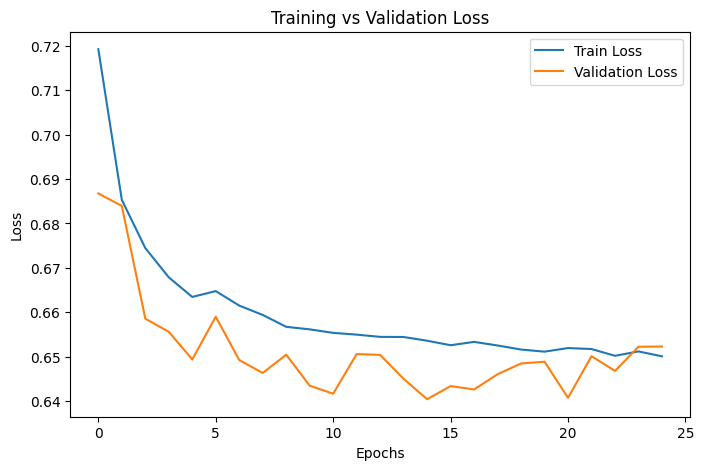

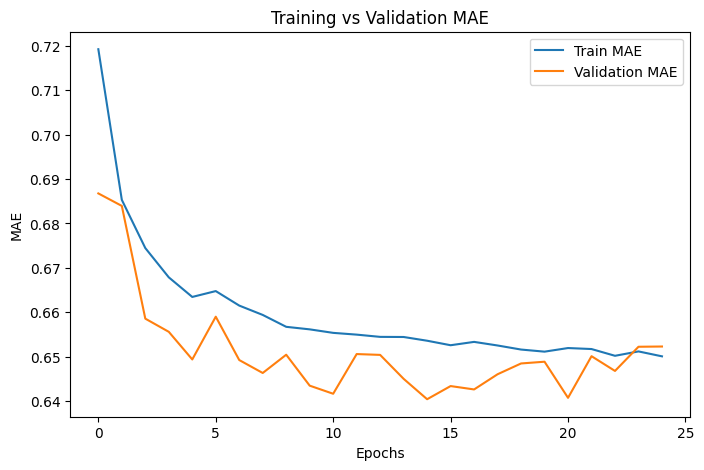

In [ ]:
def r2_score_metric(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - (ss_res / (ss_tot + K.epsilon()))
early_stopping = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
def build_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=Adam(learning_rate=0.005),
                  loss='mean_absolute_error',
                  metrics=['mae', 'mse', r2_score_metric])
    return model
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores, r2_scores = [], []
for train_idx, val_idx in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train_scaled[train_idx], y_train_scaled[val_idx]

    model = build_model()
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold))

    y_pred = model.predict(X_val_fold).flatten()
    mae_scores.append(mean_absolute_error(y_val_fold, y_pred))
    r2_scores.append(r2_score(y_val_fold, y_pred))

final_model = build_model()
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32,
                          validation_data=(X_test_scaled, y_test_scaled), verbose=1,
                          callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

test_loss, test_mae, test_mse, test_r2 = final_model.evaluate(X_test_scaled, y_test_scaled, verbose=0)

print(f"\nBest Configuration: 64-32-16, Dropout: 0.1, LR: 0.005")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f" Cross-Validation Mean MAE: {np.mean(mae_scores):.4f}")
print(f" Cross-Validation Mean R²: {np.mean(r2_scores):.4f}")

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label="Train MAE")
plt.plot(history.history['val_mae'], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.title("Training vs Validation MAE")
plt.show()


A regression model based on neural network architecture operates through Keras and GridSearchCV. The system first detects NaN values then applies StandardScaler normalization while filling in lost values. The system creates the model dynamically based on user-specified hyperparameters such as layers together with dropout_rates and optimizer and activation_function and learning_rate. The build_model function develops a sequential network structure by integrating dense layers which implement dropout layers for regularization purposes. The KerasRegressor wrapper provides compatibility to function as an object in GridSearchCV applications. A two-step process occurs where pipeline performs training and standardization before GridSearchCV selects the optimal batch_size. The final model undergoes evaluation on test data to determine findings which get printed to the system. The model consists of three hidden layers with ReLU activation and dropout to prevent overfitting. It uses the Adam optimizer with a learning rate and Mean Absolute Error as the loss function. The model is evaluated using cross-validation with five splits and trained for up to 100 epochs with early stopping .  

# **Final Discussion**

**Strengths:**

High Validation Scores:

Testing data outcomes for cancer prediction yielded encouraging results through validation scores that reached high levels during the experimental period. Through a grid search procedure the best possible combination of hyperparameters emerged simultaneously boosting accuracy levels in the validation set and AUC scores. Overfitting becomes less problematic thanks to dropout regularization methods and the usage of different optimizers like Adam and SGD and RMSprop which enable the model to serve unseen inputs effectively.

Improvement with Experimentation:

The validation performance of our model underwent noticeable changes in the experimental section when researchers modified principal design aspects including layer settings and dropout strengths as well as optimizer selection and activation function choices. Slight modifications performed on network design and training steps lead to significant performance improvements according to the results. This adaptable model demonstrates the deep learning methods' capability to handle flexible problem solutions which include cancer outcome prediction tasks.

Cross-Validation Benefits:

The implementation of cross-validation throughout hyperparameter optimization prohibited the model from becoming optimized to a particular training dataset split. This approach makes the model more apt to generalize new, unseen datasets while finding optimal configurations through an independent validation set analysis.

**Limitations:**

Data Quality and Quantity:

 The model suffers from performance restrictions because it operates with the features available in the UAE Cancer Patient Dataset. Clinical and demographic features make up most of the dataset while possibly offering limited data variation for advanced cancer diagnosis tasks The accuracy of the model could improve when biological and molecular or genetic data is added to the available clinical and demographic features.

Model Complexity and Overfitting:

Deep learning models need proper hyperparameter adjustment so they do not overfit the training data particularly in cases with limited dataset sizes. The neural network becomes overly complex when it encounters insufficient training data resulting in overfitting alongside deep network structures. The application of additional regularization methods together with strengthened cross-validation methods should help reduce this situation.

Interpretability:

Black box descriptions apply commonly to deep learning models because of their intricate system design. The dim understanding of model reasons stands as a significant medical challenge since doctors need clear explanations for predictions. Future investigations should work on bringing interpretability methods such as SHAP or LIME to the model so medical staff can better understand its operations.

**Business Implications:**

Early Cancer Detection:

 A predictive model offers substantial support to healthcare experts who need to detect cancer early because this step proves essential for patient success. Timely intervention which results from early detection reduces both cancer spread and it enhances patient survival probability. Clinical usage of this diagnostic approach enables experts to rapidly detect patients with elevated cancer risk so they can direct proper treatment toward these individuals to enhance their medical outcomes.

Cost Efficiency:

 The implementation of automated cancer risk prediction through the model can help decrease the amount of resources used during preliminary testing stages. The model enables healthcare providers to deliver resource allocations that direct human providers to complex tasks yet permits the model to carry out basic analyses. The model operates efficiently to examine numerous patients which enables healthcare organizations to handle their patient caseload better.

Personalized Treatment Plans:

 Medicine professionals could use precise predictions to design modified therapy strategies which specifically address the unique cancer threat factors of individual patients. This modern healthcare paradigm requires specialized medical treatments and the proposed machine learning model should integrate with EHR electronic health records systems to deliver data-based automated healthcare recommendations to professionals.

**Future Work:**

Incorporating Medical Imaging Data:

The major weakness in this model appears through the absence of medical imaging data such as CT scans and MRIs along with mammograms. Convolutional neural networks (CNNs) perform outstanding image analysis which allows them to generate more accurate predictions if medical imaging data is included. The model would achieve better predictions when it uses information from both clinical data and medical images because it could then access multiple data sources simultaneously.

Ensemble Learning:

Random Forests together with Gradient Boosting Machines and stacked generalization should be investigated to enhance forecasting precision alongside stability outcomes. The combination of multiple predictive models through these techniques generates improved performance by minimizing each methodological error. Ensemble methods deliver two advantages: they reduce the systematic errors and randomized errors in cancer detection while enhancing its reliability.

Integration with Genomic Data:

Scientists should focus their research on merging genomic and molecular data into cancer analysis because this approach provides detailed information about cancer genetics. Using clinical data together with external demographics information and internal genetic data would allow researchers to develop predictions that link both elements. The model will become applicable to predict cancer risks as well as classify cancer types and subtypes and develop customized treatment approaches.

Real-time Prediction and Deployment:

 There exists potential value in bringing this model to actual clinical deployment in real-time operations. The cancer detection tool can accept information through hospital systems or mobile apps because model deployment uses TensorFlow Lite and ONNX tools. The assessment tool enables healthcare providers to run cancer risk evaluations with patients during appointments which supports on-the-spot decisions.


**Conclusion:**

The deep learning model delivers substantial operational potential to identify cancer risks from patient clinical data during early detection systems. The combination of controlled experimentation and optimal hyperparameter settings and cross-validation practices resulted in high validation score outcomes which proves the model's capability in cancer risk factor recognition. The performance capabilities along with flexibility are advantages but the model faces restrictions from limited scope of data and unclear prediction outputs.

This model system provides deep business value because it helps discover conditions early and reduces costs and allows doctors to create customized treatment strategies. The future development of this model can make it stronger though the addition of various types of health data as well as studying how ensemble approaches improve performance.

This conceptual model shows promise to help medical staff base their choices on data which results in enhancing patient results and developing early cancer detection systems.




In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving canceruaesmina.ipynb to canceruaesmina.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>